In [1]:
%matplotlib inline

In [19]:
import numpy
import skimage.exposure
import skimage.feature
import skimage.io
import sklearn.decomposition
import skimage.transform

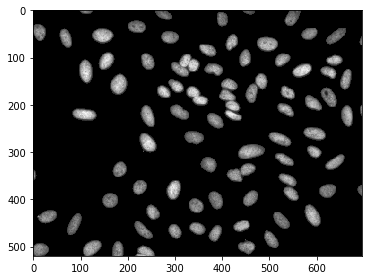

In [3]:
image = skimage.io.imread("../images/1.png")
label = skimage.io.imread("../labels/1.png")

label = skimage.measure.label(label)

image[label == 0] = 0

image = skimage.exposure.rescale_intensity(image)

skimage.io.imshow(image)

In [4]:
properties = skimage.measure.regionprops(label, image)

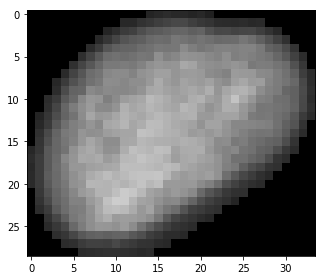

In [13]:
region = properties[20]["intensity_image"]

skimage.io.imshow(region)

In [59]:
descriptor = skimage.feature.CENSURE()

descriptor.detect(image)

keypoints = descriptor.keypoints

scales = descriptor.scales.reshape((-1, 1))

keypoints = numpy.hstack([keypoints, scales])

In [88]:
descriptor = skimage.feature.ORB()

descriptor.detect_and_extract(image)

keypoints = descriptor.keypoints

scales = descriptor.scales.reshape((-1, 1))

orientations = descriptor.orientations.reshape((-1, 1))

responses = descriptor.orientations.reshape((-1, 1))

keypoints = numpy.hstack([keypoints, scales, orientations, responses])

In [92]:
descriptor.descriptors.shape

(500, 256)